Struktur Data

premise: Kalimat premis.

hypothesis: Kalimat hipotesis.

label: Label hubungan antara premis dan hipotesis:

0: Entailment

1: Contradiction

2: Neutral

**Dataset Train:**

Dataset ini digunakan untuk melatih model. Model akan belajar dari data ini dengan mencari pola dan hubungan antar fitur (variabel) dan target (label). Proses ini melibatkan penyesuaian parameter model agar dapat memprediksi output dengan baik.

**Dataset Validation:**

Dataset ini digunakan untuk mengoptimalkan model selama proses pelatihan. Setelah model dilatih dengan dataset train, dataset validation digunakan untuk mengevaluasi kinerja model. Dengan menggunakan data ini, Anda dapat melakukan hyperparameter tuning, memilih model terbaik, dan mencegah overfitting (ketika model terlalu cocok dengan data train sehingga kinerjanya buruk pada data baru).

**Dataset Test:**

Dataset ini digunakan untuk mengukur kinerja akhir dari model setelah selesai dilatih dan dioptimalkan. Dataset test berfungsi sebagai data yang tidak pernah dilihat oleh model sebelumnya, sehingga dapat memberikan gambaran yang lebih akurat tentang bagaimana model akan bekerja pada data baru di dunia nyata. Ini adalah langkah penting untuk memastikan bahwa model dapat

In [ ]:
# +------------------+
# |   Data Teks      |
# | (premise +       |
# |  hypothesis)     |
# +--------+---------+
#          |
#          v
# +------------------+
# |  Tokenisasi dan  |
# |  Padding         |
# | (Mengonversi     |
# |  teks menjadi    |
# |  urutan angka)   |
# +--------+---------+
#          |
#          v
# +------------------+
# |  Memuat GloVe    |
# |  Embeddings      |
# | (Vektor kata     |
# |  dari file)      |
# +--------+---------+
#          |
#          v
# +------------------+
# |  Matriks         |
# |  Embedding       |
# | (Menyusun        |
# |  matriks dari    |
# |  embeddings)     |
# +--------+---------+
#          |
#          v
# +------------------+
# |  Label One-Hot   |
# |  Encoding        |
# | (Mengonversi     |
# |  label ke format |
# |  one-hot)        |
# +--------+---------+
#          |
#          v
# +------------------+
# |  Membangun Model |
# |  Encoder         |
# | (Menambahkan     |
# |  layer embedding,|
# |  LSTM, dan Dense)|
# +--------+---------+
#          |
#          v
# +------------------+
# |  Melatih Model   |
# | (Menggunakan     |
# |  data pelatihan) |
# +--------+---------+
#          |
#          v
# +------------------+
# |  Evaluasi Model  |
# | (Menggunakan     |
# |  data uji)       |
# +------------------+

# DATASET

Penjelasan: Dataset SNLI (Stanford Natural Language Inference) dimuat menggunakan pustaka datasets dari Hugging Face. Dataset ini digunakan untuk tugas inferensi natural (NLI), dengan label:

0: Entailment (premis menyiratkan hipotesis).

1: Neutral (premis tidak menyiratkan atau bertentangan dengan hipotesis).

2: Contradiction (premis bertentangan dengan hipotesis).

In [1]:
import pandas as pd

splits = {'test': 'plain_text/test-00000-of-00001.parquet', 'validation': 'plain_text/validation-00000-of-00001.parquet', 'train': 'plain_text/train-00000-of-00001.parquet'}
datasets = pd.read_parquet("hf://datasets/stanfordnlp/snli/" + splits["test"])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [2]:
!pip install datasets

In [3]:
from datasets import load_dataset

# Memuat dataset SNLI
dataset = load_dataset("snli")

# Memisahkan data Data train, validation, dan test
train_data = dataset['train']
validation_data = dataset['validation']
test_data = dataset['test']

# Contoh tampilan data
print(train_data[0])  # Menampilkan contoh data pertama dari train


{'premise': 'A person on a horse jumps over a broken down airplane.', 'hypothesis': 'A person is training his horse for a competition.', 'label': 1}


train_data: Untuk melatih model.

validation_data: Untuk memantau performa model selama pelatihan.

test_data: Untuk mengevaluasi model setelah pelatihan selesai.

In [4]:
# Konversi split
test_df = pd.DataFrame(test_data)
train_df = pd.DataFrame(train_data)
validation_df = pd.DataFrame(validation_data)


In [5]:
test_df.head()

,premise,hypothesis,label
0,This church choir sings to the masses as they ...,The church has cracks in the ceiling.,1
1,This church choir sings to the masses as they ...,The church is filled with song.,0
2,This church choir sings to the masses as they ...,A choir singing at a baseball game.,2
3,"A woman with a green headscarf, blue shirt and...",The woman is young.,1
4,"A woman with a green headscarf, blue shirt and...",The woman is very happy.,0


# Pre-processing

**Mengganti tanda baca:** Menghapus atau mengganti tanda baca yang tidak diperlukan.

**Menurunkan huruf besar ke huruf kecil:** **bold text** Untuk menjaga konsistensi dan menghindari duplikasi kata karena perbedaan case.

**Menghapus angka:** Kadang-kadang angka tidak relevan dalam analisis teks, tergantung pada konteks.

**Stemming atau Lemmatization:** Mengubah kata ke bentuk dasar. Di sini, kita menggunakan lemmatization yang lebih akurat dalam menjaga konteks makna.

**Menghapus stopwords:** Kata-kata umum yang tidak mengandung informasi penting, seperti "the", "a", dll.

## Cek Missing value

In [6]:
# Cek missing values train
print(train_df.isnull().sum())

premise       0
hypothesis    0
label         0
dtype: int64


In [7]:
# Cek missing values validation
print(validation_df.isnull().sum())

premise       0
hypothesis    0
label         0
dtype: int64


In [8]:
# Cek missing values test
print(test_df.isnull().sum())

premise       0
hypothesis    0
label         0
dtype: int64


## Cleaning

In [9]:
# Daftar dataframe untuk iterasi
dfs = [train_df, validation_df, test_df]

# Pembersihan setiap dataframe
for df in dfs:
    # Cek duplikat
    print(f"Duplicate rows in {df} before cleaning:")
    print(df.duplicated().sum())

Duplicate rows in                                                   premise  \
0       A person on a horse jumps over a broken down a...   
1       A person on a horse jumps over a broken down a...   
2       A person on a horse jumps over a broken down a...   
3                   Children smiling and waving at camera   
4                   Children smiling and waving at camera   
...                                                   ...   
550147                Four dirty and barefooted children.   
550148                Four dirty and barefooted children.   
550149  A man is surfing in a bodysuit in beautiful bl...   
550150  A man is surfing in a bodysuit in beautiful bl...   
550151  A man is surfing in a bodysuit in beautiful bl...   

                                               hypothesis  label  
0       A person is training his horse for a competition.      1  
1           A person is at a diner, ordering an omelette.      2  
2                       A person is outdoors, on

In [10]:
# Cek jumlah baris duplikat sebelum pembersihan
print(f"Duplicate rows in train_df before cleaning: {train_df.duplicated().sum()}")
print(f"Duplicate rows in validation_df before cleaning: {validation_df.duplicated().sum()}")
print(f"Duplicate rows in test_df before cleaning: {test_df.duplicated().sum()}")

Duplicate rows in train_df before cleaning: 547
Duplicate rows in validation_df before cleaning: 2
Duplicate rows in test_df before cleaning: 0


In [11]:
# Pembersihan duplikat setelah pengecekan
for df in dfs:
    print(f"Duplicate rows in {df} before cleaning:")
    print(df.duplicated().sum())

    # Hapus duplikat jika ada
    df.drop_duplicates(inplace=True)

Duplicate rows in                                                   premise  \
0       A person on a horse jumps over a broken down a...   
1       A person on a horse jumps over a broken down a...   
2       A person on a horse jumps over a broken down a...   
3                   Children smiling and waving at camera   
4                   Children smiling and waving at camera   
...                                                   ...   
550147                Four dirty and barefooted children.   
550148                Four dirty and barefooted children.   
550149  A man is surfing in a bodysuit in beautiful bl...   
550150  A man is surfing in a bodysuit in beautiful bl...   
550151  A man is surfing in a bodysuit in beautiful bl...   

                                               hypothesis  label  
0       A person is training his horse for a competition.      1  
1           A person is at a diner, ordering an omelette.      2  
2                       A person is outdoors, on

In [12]:
# Cek jumlah baris duplikat after pembersihan
print(f"Duplicate rows in train_df after cleaning: {train_df.duplicated().sum()}")
print(f"Duplicate rows in validation_df after cleaning: {validation_df.duplicated().sum()}")
print(f"Duplicate rows in test_df after cleaning: {test_df.duplicated().sum()}")

Duplicate rows in train_df after cleaning: 0
Duplicate rows in validation_df after cleaning: 0
Duplicate rows in test_df after cleaning: 0


## huruf, tanda baca, whitespace extra

### Downloading package

In [14]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [15]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [16]:
from nltk.tokenize import word_tokenize
sample_text = "This is a sample text, with numbers like 123 and punctuation!"
print(word_tokenize(sample_text))  # Harus berhasil jika tokenizer tersedia

['This', 'is', 'a', 'sample', 'text', ',', 'with', 'numbers', 'like', '123', 'and', 'punctuation', '!']


### process

In [17]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

# Helper function to map NLTK POS tags to WordNet POS tags
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Main preprocessing function
def preprocess_text(text):
    """
    Preprocesses text by normalizing, removing noise, tokenizing, removing stop words,
    and lemmatizing with proper POS tagging.

    Args:
        text (str): Input text string to preprocess.

    Returns:
        str: Cleaned and preprocessed text.
    """
    # memerikasa tipe data -----------
    if not isinstance(text, str):
        return ""

    # 1. Lowercasing -----------------
    text = text.lower()

    # 2. Remove numbers and punctuation ----------------
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation

    # 3. Tokenization ---------------
    tokens = nltk.word_tokenize(text)

    # 4. Remove stop words -------------------------
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # 5. POS tagging and Lemmatization ------------
    pos_tags = nltk.pos_tag(tokens)
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]

    # 6. Join tokens back into a single string ---------------
    return ' '.join(lemmatized_tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Download necessary NLTK resources
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('stopwords')

# Helper function to map NLTK POS tags to WordNet POS tags
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Main preprocessing function
def preprocess_text(text):
    """
    Preprocesses text by normalizing, removing noise, tokenizing, removing stop words,
    and lemmatizing with proper POS tagging.

    Args:
        text (str): Input text string to preprocess.

    Returns:
        str: Cleaned and preprocessed text.
    """
    if not isinstance(text, str):
        return ""

    # 1. Lowercasing
    text = text.lower()

    # 2. Remove numbers and punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation

    # 3. Tokenization
    tokens = nltk.word_tokenize(text)

    # 4. Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # 5. POS tagging and Lemmatization
    pos_tags = nltk.pos_tag(tokens)
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]

    # 6. Join tokens back into a single string
    return ' '.join(lemmatized_tokens)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
import re

# Fungsi untuk membersihkan teks----------------------------
def clean_text(text):
    # Mengubah teks menjadi huruf kecil
    text = text.lower()
    # Menghapus tanda baca dan karakter khusus
    text = re.sub(r'[^\w\s]', '', text)
    # Menghapus angka
    text = re.sub(r'\d+', '', text)
    return text

# Pembersihan DataFrame ------------------------------------
def clean_dataframe(df):
    # Menghapus duplikasi
    df = df.drop_duplicates()

    # Menghapus baris dengan nilai kosong
    df = df.dropna(subset=['premise', 'hypothesis', 'label'])

    # Normalisasi teks
    df['premise'] = df['premise'].apply(preprocess_text)
    df['hypothesis'] = df['hypothesis'].apply(preprocess_text)

    return df

# Menerapkan pembersihan pada DataFrame ----------------------
train_df = clean_dataframe(train_df)
validation_df = clean_dataframe(validation_df)
test_df = clean_dataframe(test_df)

# Menampilkan informasi tentang DataFrame setelah pembersihan
print("Train DataFrame shape:", train_df.shape)
print("Validation DataFrame shape:", validation_df.shape)
print("Test DataFrame shape:", test_df.shape)

# Menampilkan beberapa contoh data yang sudah dibersihkan
print(train_df.head())

Train DataFrame shape: (548117, 3)
Validation DataFrame shape: (9998, 3)
Test DataFrame shape: (10000, 3)
                            premise                      hypothesis  label
0  person horse jump break airplane  person train horse competition      1
1  person horse jump break airplane     person diner order omelette      2
2  person horse jump break airplane           person outdoors horse      0
3           child smile wave camera                    smile parent      1
4           child smile wave camera                   child present      0




---



In [21]:
# Cek data setelah preprocessing teks
train_df.head(10)

,premise,hypothesis,label
0,person horse jump break airplane,person train horse competition,1
1,person horse jump break airplane,person diner order omelette,2
2,person horse jump break airplane,person outdoors horse,0
3,child smile wave camera,smile parent,1
4,child smile wave camera,child present,0
5,child smile wave camera,kid frown,2
6,boy jump skateboard middle red bridge,boy skate sidewalk,2
7,boy jump skateboard middle red bridge,boy skateboard trick,0
8,boy jump skateboard middle red bridge,boy wear safety equipment,1
9,old man sit orange juice small table coffee sh...,old man drink juice wait daughter get work,1


In [22]:
# Cek data sebelum preprocessing teks
train_data_df = pd.DataFrame(train_data)
train_data_df.head(10)

,premise,hypothesis,label
0,A person on a horse jumps over a broken down a...,A person is training his horse for a competition.,1
1,A person on a horse jumps over a broken down a...,"A person is at a diner, ordering an omelette.",2
2,A person on a horse jumps over a broken down a...,"A person is outdoors, on a horse.",0
3,Children smiling and waving at camera,They are smiling at their parents,1
4,Children smiling and waving at camera,There are children present,0
5,Children smiling and waving at camera,The kids are frowning,2
6,A boy is jumping on skateboard in the middle o...,The boy skates down the sidewalk.,2
7,A boy is jumping on skateboard in the middle o...,The boy does a skateboarding trick.,0
8,A boy is jumping on skateboard in the middle o...,The boy is wearing safety equipment.,1
9,An older man sits with his orange juice at a s...,An older man drinks his juice as he waits for ...,1


### Rincian Proses

In [23]:
# Contoh teks untuk diproses
input_text = "The quick brown fox jumps over the lazy dog 123!"

# Memanggil fungsi preprocess_text
output_text = preprocess_text(input_text)

# Menampilkan hasil
print("Input Text:", input_text)
print("Output Text:", output_text)

Input Text: The quick brown fox jumps over the lazy dog 123!
Output Text: quick brown fox jump lazy dog


Rincian Proses
1. **Lowercasing:**

  Semua huruf diubah menjadi huruf kecil.
2. **Remove numbers and punctuation:**

  Angka "123" dan tanda baca dihapus.
3. **Tokenization:**

  Teks dipecah menjadi token:
  ['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']
4. **Remove stop words: **

  Kata-kata umum yang tidak memberikan makna penting dihapus: ['quick', 'brown', 'fox', 'jumps', 'lazy', 'dog']

5. **POS tagging and Lemmatization:**

  Kata-kata di-lemmatize berdasarkan POS mereka, menghasilkan: ['quick', 'brown', 'fox', 'jump', 'lazy', 'dog']


6. **Join tokens back into a single string:**

  Token yang telah diproses digabung kembali menjadi string.

# Embedding

## menentukan panjang maksimal (max_length) yang optimal

In [24]:
import pandas as pd

# Tambahkan kolom panjang teks ke dataframe
train_df['premise_length'] = train_df['premise'].apply(lambda x: len(x.split()))
train_df['hypothesis_length'] = train_df['hypothesis'].apply(lambda x: len(x.split()))

validation_df['premise_length'] = validation_df['premise'].apply(lambda x: len(x.split()))
validation_df['hypothesis_length'] = validation_df['hypothesis'].apply(lambda x: len(x.split()))

test_df['premise_length'] = test_df['premise'].apply(lambda x: len(x.split()))
test_df['hypothesis_length'] = test_df['hypothesis'].apply(lambda x: len(x.split()))


In [25]:
# Gabungkan panjang teks premise dan hypothesis
train_lengths = pd.concat([train_df['premise_length'], train_df['hypothesis_length']])

# Statistik dasar
print(train_lengths.describe())

count    1.096234e+06
mean     5.676553e+00
std      3.023004e+00
min      0.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      7.000000e+00
max      4.500000e+01
dtype: float64


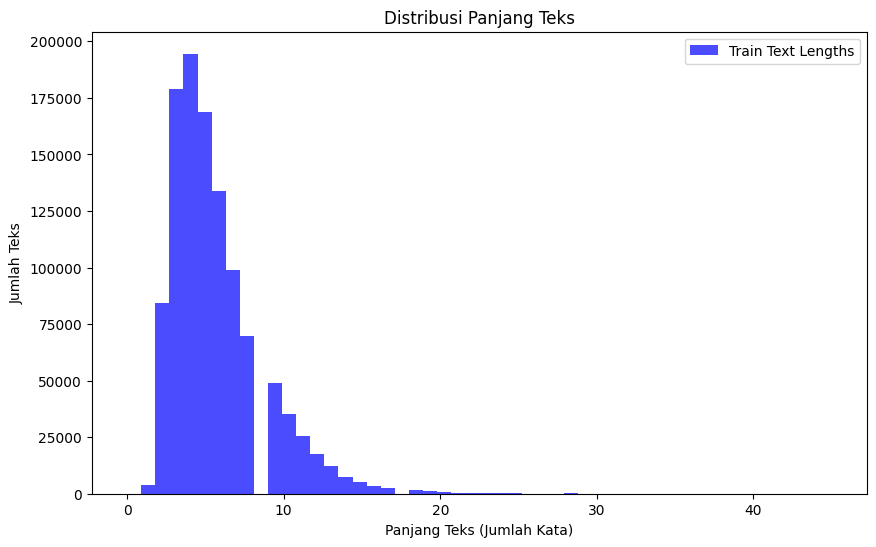

In [26]:
import matplotlib.pyplot as plt

# Plot histogram panjang teks
plt.figure(figsize=(10, 6))
plt.hist(train_lengths, bins=50, color='blue', alpha=0.7, label='Train Text Lengths')
plt.xlabel('Panjang Teks (Jumlah Kata)')
plt.ylabel('Jumlah Teks')
plt.title('Distribusi Panjang Teks')
plt.legend()
plt.show()


In [27]:
# Hitung panjang pada persentil 95
max_length = int(train_lengths.quantile(0.95))
print(f"Max Length (95th Percentile): {max_length}")


Max Length (95th Percentile): 11


## Ekstraksi Premis, Hipotesis, dan Label pada data TRAIN

premise: Kalimat dasar.

hypothesis: Klaim yang akan dibandingkan dengan premis.

label: Kategori hubungan antara premis dan hipotesis.

In [28]:
train_premise = train_df['premise']
train_hypothesis = train_df['hypothesis']
train_labels = train_df['label']

## Embandding (Tokenisasi dan Padding)

Pertama, Anda perlu mempersiapkan data mentah menjadi format yang dapat dimasukkan ke dalam model. Ini melibatkan:

Mengubah teks menjadi angka (tokenisasi).
Membatasi jumlah kata berdasarkan frekuensi.
Menyediakan padding untuk menyamakan panjang input.

### Unduh GloVe

In [29]:
# !rm -f glove.6B.zip

In [30]:
# Mengunduh GloVe embeddings dari URL
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2024-11-25 04:00:10--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-11-25 04:00:10--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-11-25 04:00:10--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.1’

gl

In [31]:
!ls -lh glove.6B.zip

-rw-r--r-- 1 root root 823M Oct 25  2015 glove.6B.zip


In [32]:
# Mengekstrak file zip
!unzip glove.6B.zip

Archive:  glove.6B.zip
replace glove.6B.50d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [33]:
!ls

glove.6B.100d.txt  glove.6B.300d.txt  glove.6B.zip    sample_data
glove.6B.200d.txt  glove.6B.50d.txt   glove.6B.zip.1


File embedding tersedia dalam dimensi berbeda:

glove.6B.50d.txt (50 dimensi)

glove.6B.100d.txt (100 dimensi)

glove.6B.200d.txt (200 dimensi)

glove.6B.300d.txt (300 dimensi)

In [34]:
# Pilih file berdasarkan kebutuhan (300 dimensi)
glove300_file_path = 'glove/glove.6B.300d.txt'

### Embendding dengan GloVe

In [36]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Memuat GloVe embeddings dari file --------------------------------------------
def load_glove_embeddings(file_path): # memuat vektor kata dari file GloVe
    embeddings_index = {} # menyimpannya dalam sebuah dictionary
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    print(f"Loaded {len(embeddings_index)} word vectors.")
    return embeddings_index

# Tokenisasi dan Representasi Vektor -------------------------------------------
# Fungsi untuk mengonversi teks ke dalam vektor menggunakan GloVe
def get_glove_embeddings(texts, embeddings_index, max_len=20):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(texts)
    sequences = tokenizer.texts_to_sequences(texts)
    word_index = tokenizer.word_index
    data = pad_sequences(sequences, maxlen=max_len) # memastikan bahwa semua urutan memiliki panjang yang sama max_len=20

    # Menyusun matriks embeddings
    embedding_dim = 300  # Dimensi sesuai dengan GloVe yang dipilih
    embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim)) # Menyusun matriks embeddings

    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

    return data, embedding_matrix, word_index

# Memuat embeddings dari GloVe
glove300_file_path = 'glove.6B.300d.txt'
embeddings_index = load_glove_embeddings(glove300_file_path)

# Mengonversi data teks menjadi vektor dengan GloVe
# menggabungkan kolom premise dan hypothesis dari DataFrame menjadi satu string untuk setiap baris
train_texts = train_df['premise'] + ' ' + train_df['hypothesis']
validation_texts = validation_df['premise'] + ' ' + validation_df['hypothesis']
test_texts = test_df['premise'] + ' ' + test_df['hypothesis']

# Menampilkan Ukuran Data
# X_train, X_val, X_test) yang berisi representasi vektor dari teks
X_train, embedding_matrix, word_index = get_glove_embeddings(train_texts, embeddings_index)
X_val, _, _ = get_glove_embeddings(validation_texts, embeddings_index)
X_test, _, _ = get_glove_embeddings(test_texts, embeddings_index)

# Menampilkan data dan ukuran embedding
print("X_train shape:", X_train.shape)
print("Embedding X_train matrix shape:", embedding_matrix.shape)

print("X_val shape:", X_val.shape)
print("Embedding X_val matrix shape:", embedding_matrix.shape)

print("X_test shape:", X_test.shape)
print("Embedding X_test matrix shape:", embedding_matrix.shape)


Loaded 400000 word vectors.
X_train shape: (548117, 20)
Embedding X_train matrix shape: (28801, 300)
X_val shape: (9998, 20)
Embedding X_val matrix shape: (28801, 300)
X_test shape: (10000, 20)
Embedding X_test matrix shape: (28801, 300)


In [37]:
import pandas as pd

# Memeriksa apakah DataFrame sudah didefinisikan
for df_name in ['train_df', 'validation_df', 'test_df']:
    try:
        df = eval(df_name)  # Mengambil DataFrame berdasarkan nama
        print(f"{df_name} sudah didefinisikan.")

        # Memeriksa kolom yang ada
        expected_columns = ['premise', 'hypothesis']
        missing_columns = [col for col in expected_columns if col not in df.columns]

        if missing_columns:
            print(f"{df_name} tidak memiliki kolom yang diperlukan: {missing_columns}")
        else:
            print(f"{df_name} memiliki kolom yang diperlukan.")
            print(f"Contoh data dari {df_name}:")
            print(df.head())  # Menampilkan beberapa baris pertama dari DataFrame
            print()  # Baris kosong untuk pemisahan output
    except NameError:
        print(f"{df_name} belum didefinisikan.")

train_df sudah didefinisikan.
train_df memiliki kolom yang diperlukan.
Contoh data dari train_df:
                            premise                      hypothesis  label  \
0  person horse jump break airplane  person train horse competition      1   
1  person horse jump break airplane     person diner order omelette      2   
2  person horse jump break airplane           person outdoors horse      0   
3           child smile wave camera                    smile parent      1   
4           child smile wave camera                   child present      0   

   premise_length  hypothesis_length  
0               5                  4  
1               5                  4  
2               5                  3  
3               4                  2  
4               4                  2  

validation_df sudah didefinisikan.
validation_df memiliki kolom yang diperlukan.
Contoh data dari validation_df:
                                             premise  \
0                  two woman 

menunjukkan bahwa file GloVe berisi 400.000 vektor kata

X_train berisi 549.605 contoh (baris), dan setiap contoh diwakili oleh urutan kata dengan panjang maksimum 50

matriks embedding memiliki 35.523 kata yang ada dalam word_index yang digunakan di dataset Anda (termasuk token yang tidak ada dalam GloVe). Setiap kata diwakili oleh vektor dengan dimensi 300, sesuai dengan GloVe 300d yang Anda pilih.

Model LSTM (Encoder dan Decoder)

Apa Itu Encoder dan Decoder?

1. Encoder: Bagian dari model yang bertugas untuk menerima input (misalnya, urutan kata dalam kalimat) dan mengubahnya menjadi representasi tetap (atau konteks) yang dapat digunakan oleh bagian lain dari model. Encoder biasanya terdiri dari satu atau lebih lapisan LSTM yang memproses urutan input dan menghasilkan vektor konteks.

2. Decoder: Bagian dari model yang menggunakan representasi tetap yang dihasilkan oleh encoder untuk menghasilkan output (misalnya, menerjemahkan kalimat ke bahasa lain). Decoder juga dapat menggunakan LSTM dan sering kali menghasilkan output urutan demi urutan.

# Encoder Layer LSTM

Bagaimana LSTM Digunakan dalam Encoder?

1. Input Tokenisasi: Setelah melakukan tokenisasi, setiap kata dalam input diubah menjadi representasi numerik (misalnya, menggunakan embedding).

2. Lapisan Encoder LSTM: Data yang telah di-embed dimasukkan ke dalam lapisan LSTM. LSTM ini memproses urutan input dan pada setiap langkah waktu, ia memperbarui status internalnya. Setelah memproses seluruh urutan, LSTM menghasilkan vektor konteks (state) yang mewakili informasi dari seluruh urutan input.

3. Vektor Konteks: Vektor ini kemudian digunakan sebagai input untuk decoder.

`Input (X_train) --> [Embedding Layer] --> [LSTM Layer] --> [Dropout Layer] --> [Dense Layer (Output)]`

In [45]:
from tensorflow.keras.utils import to_categorical

# Mengonversi label menjadi one-hot encoding
y_train = to_categorical(train_df['label'].values, num_classes=3)  # 3 kelas: 0, 1, 2
y_val = to_categorical(validation_df['label'].values, num_classes=3)  # 3 kelas: 0, 1, 2

## Model 1

In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Parameter
embedding_dim = 300  # Dimensi dari GloVe embeddings
max_len = 20  # Panjang maksimum urutan (sama dengan yang digunakan saat padding)

# Membangun model
model = Sequential()

# Menambahkan layer Embedding
# Layer ini menggunakan matriks embeddings yang telah disiapkan
model.add(Embedding(input_dim=len(embedding_matrix),
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    input_length=max_len,
                    trainable=False))  # trainable=False berarti tidak akan melatih ulang embeddings

# Menambahkan layer LSTM
model.add(LSTM(128, return_sequences=False))  # Anda bisa mengatur units sesuai kebutuhan

# Menambahkan layer Dropout
model.add(Dropout(0.5))  # Mengatur dropout rate (misalnya 50%)

# Menambahkan layer Dense untuk output
model.add(Dense(3, activation='softmax'))  # 3 kelas: 0, 1, 2

# Mengompilasi model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Menampilkan ringkasan model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │       8,640,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,640,300 (32.96 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 8,640,300 (32.96 MB)

In [47]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss',
                               mode='min',
                               patience=5,
                               restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=300,  # Set a high number of epochs
                    batch_size=32,
                    callbacks=[early_stopping])

Epoch 1/300
17129/17129 ━━━━━━━━━━━━━━━━━━━━ 851s 49ms/step - accuracy: 0.5855 - loss: 0.5224 - val_accuracy: 0.4222 - val_loss: 0.6593
Epoch 2/300
17129/17129 ━━━━━━━━━━━━━━━━━━━━ 853s 49ms/step - accuracy: 0.6817 - loss: 0.4398 - val_accuracy: 0.4162 - val_loss: 0.6764
Epoch 3/300
17129/17129 ━━━━━━━━━━━━━━━━━━━━ 866s 49ms/step - accuracy: 0.7036 - loss: 0.4169 - val_accuracy: 0.4280 - val_loss: 0.6833
Epoch 4/300
17129/17129 ━━━━━━━━━━━━━━━━━━━━ 864s 49ms/step - accuracy: 0.7168 - loss: 0.4032 - val_accuracy: 0.4130 - val_loss: 0.6894
Epoch 5/300
17129/17129 ━━━━━━━━━━━━━━━━━━━━ 866s 49ms/step - accuracy: 0.7276 - loss: 0.3922 - val_accuracy: 0.4138 - val_loss: 0.7128
Epoch 6/300
17129/17129 ━━━━━━━━━━━━━━━━━━━━ 858s 49ms/step - accuracy: 0.7338 - loss: 0.3847 - val_accuracy: 0.4201 - val_loss: 0.7084


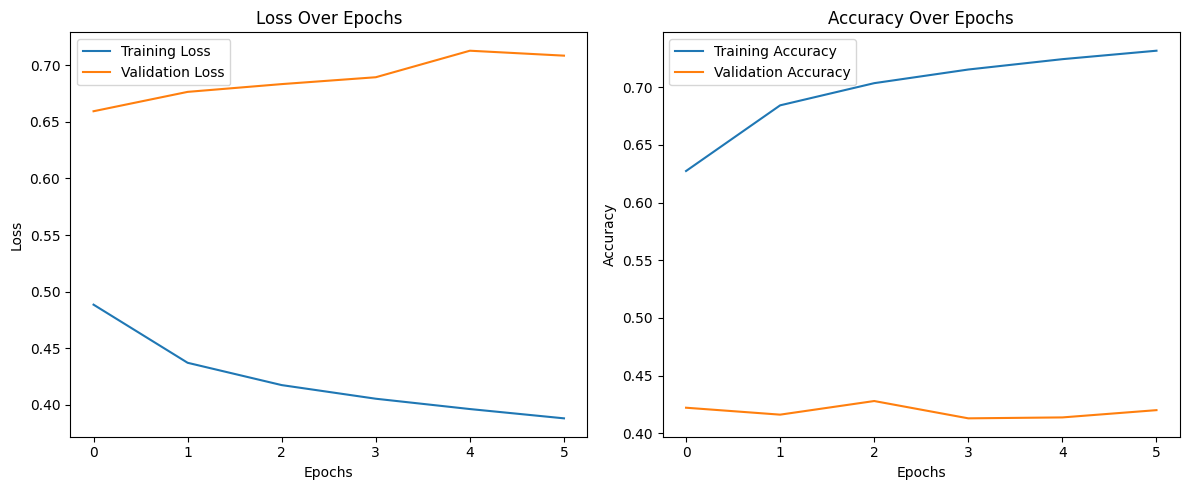

In [48]:
import matplotlib.pyplot as plt

# Mengambil nilai loss dari history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Menggambar grafik loss
plt.figure(figsize=(12, 5))

# Grafik Loss
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Jika Anda juga melacak akurasi, ambil nilai akurasi
if 'accuracy' in history.history:
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    # Grafik Akurasi
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracy, label='Training Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()

In [50]:
# # 3. PENGUJIAN MODEL---------------------------------------------------------------

# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# # Assuming you have your test data as X_test and y_test
# y_pred = model.predict(X_test)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy:.2f}')

# # Generate a classification report
# print(classification_report(y_test, y_pred))

# # Confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred)
# print('Confusion Matrix:')
# print(conf_matrix)